.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

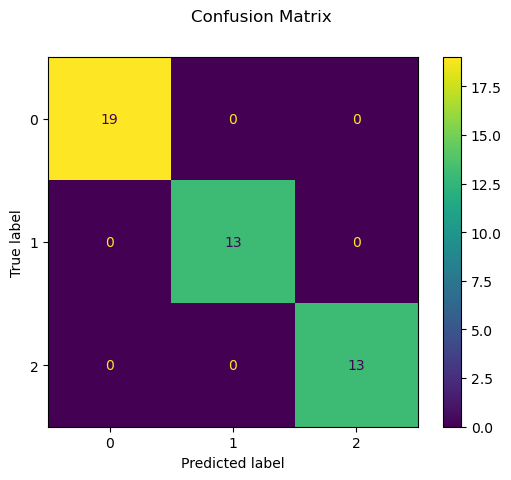

MAE: 0.5272474538305952
MSE: 0.5305677824766752
R2 Score: 0.5957702326061665


In [8]:
# Fundamental libraries for data handling and computation
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Built on matplotlib, provides prettier and easier plots
from sklearn.linear_model import LinearRegression


# Machine Learning specific libraries
from sklearn import datasets  # To load the Iris dataset
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.preprocessing import StandardScaler  # To standardize our features
from sklearn.linear_model import LogisticRegression # The model we will use
from sklearn import metrics  # To evaluate our model's performance

#Load and Explore the data
#Load iris dataset
iris = datasets.load_iris()
#Let's see what's in
print(iris.DESCR) #Read the description
#Create dataframe for easier viewing
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target # This is the label (0,1,2 for flower types)
print(iris_df.head()) #look at the first 5 rows
print(iris_df['target'].value_counts()) #Check the distribution of labels

#Preprocess and split the data
#Define features X and label Y
X = iris.data
y = iris.target

#Split the data 70% training, 30% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#Let's scale our features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Fit on training data
X_test_scaled = scaler.transform(X_test) #transform data with the same scaler

#Train a model to evaluate

#Choose a model: Logistic Regression(for classification)
model = LogisticRegression()
#Train the model on the scaled TRAINING data
model.fit(X_train_scaled,y_train)
#Make predictions on the scaled TEST data
y_pred = model.predict(X_test_scaled)
#Evaluate
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#Let's see the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

#Repeat for regression(Carlifonia Housing)
#Load regression dataset
housing = datasets.fetch_california_housing()
X_reg = housing.data
y_reg = housing.target
#Split and scale
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,test_size=0.3,random_state=42)
scaler_reg=StandardScaler()
X_train_reg_scaled=scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled=scaler_reg.transform(X_test_reg)
#Train a linear regression model
reg_model=LinearRegression()
reg_model.fit(X_train_reg_scaled,y_train_reg)
y_pred_reg=reg_model.predict(X_test_reg_scaled)

#Evaluate for regression
print("MAE:",metrics.mean_absolute_error(y_test_reg,y_pred_reg))
print("MSE:",metrics.mean_squared_error(y_test_reg,y_pred_reg))
print("R2 Score:",metrics.r2_score(y_test_reg,y_pred_reg))#Closer to 1.0 is better